# Bolsa de valores

Prevendo o volume de ações utilizando o modelo Random Forest Regressor com inclusão de indicadores financeiros como CMO, DX e MFI

* Utilizaremos dados do Yahoo Finance da PETR4 num intervalo de tempo específico

* Dados serão obtido através da biblioteca Pandas DataReader

Importando bibliotecas

In [169]:
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np

Definindo janela de tempo

In [170]:
start = dt.datetime(2018,1,1)
end = dt.datetime(2020,9,30)

Obtendo dados da PETR4

In [171]:
PETR4 = web.DataReader('PETR4.SA',"yahoo",start,end)

Exibindo as cinco primeiras linhas

In [172]:
PETR4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,16.549999,16.190001,16.190001,16.549999,33461800.0,15.353477
2018-01-03,16.719999,16.370001,16.490000,16.700001,55940900.0,15.492632
2018-01-04,16.959999,16.620001,16.780001,16.730000,37064900.0,15.520465
2018-01-05,16.860001,16.570000,16.700001,16.830000,26958200.0,15.613236
2018-01-08,17.030001,16.709999,16.740000,17.030001,28400000.0,15.798776


Adicionando indicadores

In [173]:
High = PETR4['High'].values
Low = PETR4['Low'].values
Open = PETR4['Open'].values
Close = PETR4['Close'].values
Volume = PETR4['Volume'].values

In [174]:
from talib._ta_lib import ADX, APO, CCI, CMO, DX, RSI, DX, MACD, MFI, ROC, RSI, ULTOSC

Indicador ADX

In [175]:
PETR4['ADX'] = ADX(High, Low, Close, timeperiod=14)

Indicador APO

In [176]:
PETR4['APO'] = APO(Close, fastperiod=12, slowperiod=26, matype=0)

Indicador CCI

In [177]:
PETR4['CCI'] = CCI(High, Low, Close, timeperiod=14)

Indicador CMO

In [178]:
PETR4['CMO'] = CMO(Close, timeperiod=14)

Indicador DX

In [179]:
PETR4['DX'] = DX(High, Low, Close, timeperiod=14)

Indicador MACD

In [180]:
macd, macdsignal, macdhist = MACD(Close, fastperiod=12, slowperiod=26, signalperiod=9)

In [181]:
PETR4['MACD'] = macd

Indicador MFI

In [182]:
PETR4['MFI'] = MFI(High, Low, Close, Volume, timeperiod=14)

Indicador ROC

In [183]:
PETR4['ROC'] = ROC(Close, timeperiod=10)

Indicador RSI

In [184]:
PETR4['RSI'] = RSI(Close, timeperiod=14)

Indicador ULTOSC

In [185]:
PETR4['ULTOSC'] = ULTOSC(High, Low, Close, timeperiod1=7, timeperiod2=14, timeperiod3=28)

Verificando amostra

In [186]:
PETR4.head()

,High,Low,Open,Close,Volume,Adj Close,ADX,APO,CCI,CMO,DX,MACD,MFI,ROC,RSI,ULTOSC
Date,,,,,,,,,,,,,,,,
2018-01-02,16.549999,16.190001,16.190001,16.549999,33461800.0,15.353477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,16.719999,16.370001,16.490000,16.700001,55940900.0,15.492632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,16.959999,16.620001,16.780001,16.730000,37064900.0,15.520465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,16.860001,16.570000,16.700001,16.830000,26958200.0,15.613236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,17.030001,16.709999,16.740000,17.030001,28400000.0,15.798776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removendo NaNs

In [187]:
PETR4 = PETR4.dropna()

Definindo variáveis X e Y

In [188]:
X = PETR4.drop(['Volume','Adj Close'],axis=1)
Y = PETR4['Volume']

* Criando amostra de treino e teste

In [189]:
X_treino = X[X.index<'2020-01-01']
X_teste = X[X.index>='2020-01-01']

Y_treino = Y[X.index<'2020-01-01']
Y_teste = Y[X.index>='2020-01-01']

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y,test_size=0.25,random_state=42)

* Prevendo volume utilizando modelo Random Forest Regressor

In [192]:
from sklearn.ensemble import RandomForestRegressor

In [193]:
rfr = RandomForestRegressor()

In [194]:
rfr.fit(X_treino,Y_treino)

RandomForestRegressor()

In [195]:
Y_previsto = rfr.predict(X_teste)

* Graficando Y_previsto em função de Y_teste

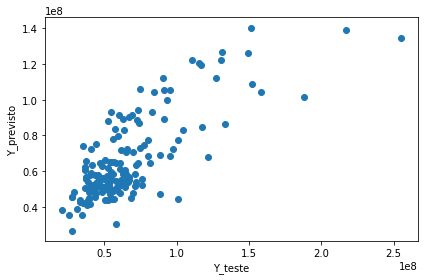

In [196]:
plt.scatter(Y_teste,Y_previsto)
plt.xlabel('Y_teste')
plt.ylabel('Y_previsto')
plt.tight_layout()

Calculando métricas de erro

In [197]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [198]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [199]:
MAE = mean_absolute_error(Y_teste,Y_previsto)
MAPE = mean_absolute_percentage_error(Y_teste,Y_previsto)
MSE = mean_squared_error(Y_teste,Y_previsto)
RMSE = np.sqrt(MSE)

In [201]:
print("MAE = {:0.2e}".format(MAE))
print("MAPE = {:0.2f}%".format(MAPE))
print("MSE = {:0.2e}".format(MSE))
print("RMSE = {:0.2e}".format(RMSE))

MAE = 1.51e+07
MAPE = 23.62%
MSE = 4.77e+14
RMSE = 2.18e+07


Podemos prever o valor com uma incerteza de 25.11%. Um pouco melhor do que o caso sem indicadores. 

In [235]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [236]:
mse = make_scorer(mean_absolute_percentage_error,greater_is_better=False)

In [237]:
parameters = {'n_estimators' : list(range(70,201))}

In [238]:
clf = GridSearchCV(rfr, parameters,n_jobs=-1,scoring=mse,verbose=True,cv=10)

In [239]:
clf.fit(X_treino,Y_treino)

Fitting 10 folds for each of 131 candidates, totalling 1310 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1310 out of 1310 | elapsed:  8.3min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=167),
             n_jobs=-1,
             param_grid={'n_estimators': [70, 71, 72, 73, 74, 75, 76, 77, 78,
                                          79, 80, 81, 82, 83, 84, 85, 86, 87,
                                          88, 89, 90, 91, 92, 93, 94, 95, 96,
                                          97, 98, 99, ...]},
             scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
             verbose=True)

In [240]:
clf.best_params_

{'n_estimators': 80}

In [246]:
rfr = RandomForestRegressor(n_estimators=80)

In [247]:
rfr.fit(X_treino,Y_treino)

RandomForestRegressor(n_estimators=80)

In [248]:
Y_previsto = rfr.predict(X_teste)

In [249]:
MAE = mean_absolute_error(Y_teste,Y_previsto)
MAPE = mean_absolute_percentage_error(Y_teste,Y_previsto)
MSE = mean_squared_error(Y_teste,Y_previsto)
RMSE = np.sqrt(MSE)

In [250]:
print("MAE = {:0.2e}".format(MAE))
print("MAPE = {:0.2f}%".format(MAPE))
print("MSE = {:0.2e}".format(MSE))
print("RMSE = {:0.2e}".format(RMSE))

MAE = 1.52e+07
MAPE = 23.62%
MSE = 4.87e+14
RMSE = 2.21e+07
